In [2]:
# Logistic Regression Project (Binary Classification)

# Sonar rock vs mine Prediction 
# Dataset = sonar_data.csv

# R = Rock
# M = Mine

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
sonar_data = pd.read_csv("sonar_data.csv",header=None)

In [5]:
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [6]:
sonar_data.shape

(208, 61)

In [7]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
# counting the number of missing values in the dataset
sonar_data.isnull().sum()  

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [10]:
x = sonar_data.drop(columns=60,axis=1)
y = sonar_data[60]

In [11]:
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=1)

In [14]:
print(x.shape , x_train.shape , x_test.shape)

(208, 60) (166, 60) (42, 60)


In [15]:
from sklearn import linear_model
model =  linear_model.LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_predict =  model.predict(x_test)

In [18]:
model.score(x_test,y_test)

0.8095238095238095

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cn = confusion_matrix(y_test,y_predict)
cn

array([[17,  3],
       [ 5, 17]], dtype=int64)

Text(24.0, 0.5, 'Truth')

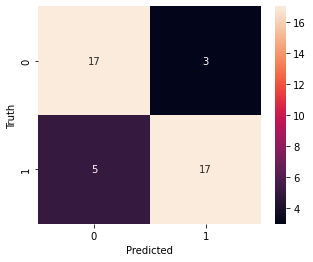

In [21]:
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cn, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [27]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test, y_predict)
print("\nclassification_report = \n ",matrix)


classification_report = 
                precision    recall  f1-score   support

           M       0.77      0.85      0.81        20
           R       0.85      0.77      0.81        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



In [28]:
# Making a Predictive System 

In [29]:
input_data=[0.0516,0.0944,0.0622,0.0415,0.0995,0.2431,0.1777,0.2018,0.2611,0.1294,0.2646,0.2778,0.4432,0.3672,0.2035,0.2764,0.3252,0.1536,0.2784,0.3508,0.5187,0.7052,0.7143,0.6814,0.5100,0.5308,0.6131,0.8388,0.9031,0.8607,0.9656,0.9168,0.7132,0.6898,0.7310,0.4134,0.1580,0.1819,0.1381,0.2960,0.6935,0.8246,0.5351,0.4403,0.6448,0.6214,0.3016,0.1379,0.0364,0.0355,0.0456,0.0432,0.0274,0.0152,0.0120,0.0129,0.0020,0.0109,0.0074,0.0078]

numpy_array= np.asarray(input_data)                   # changing the input data to numpy array
reshaped_array = numpy_array.reshape(1,-1)            # reshaping the array as we are predicting for one instance

prediction = model.predict(reshaped_array)

print(prediction)

if prediction =='R':
   print("The Object is a Rock")
else:
    print("The Object is a Mine")

['M']
The Object is a Mine
